___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

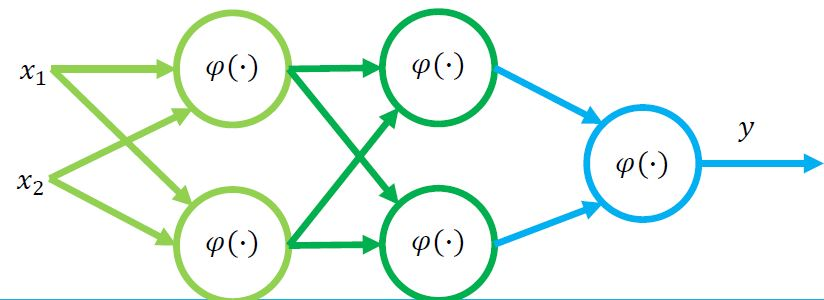

In [1]:
from IPython.display import Image
Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [2]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

2022-10-28 19:12:47.140185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data = pd.read_csv(r'diabetes.csv')

In [4]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [8]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

2022-10-28 19:13:55.368253: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
6/6 [==============================] - 1s 6ms/step - loss: 0.9142 - accuracy: 0.3277
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 0.8985 - accuracy: 0.3352
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8834 - accuracy: 0.3408
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8691 - accuracy: 0.3464
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.8558 - accuracy: 0.3482
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8430 - accuracy: 0.3557
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8307 - accuracy: 0.3669
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8192 - accuracy: 0.3743
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.8081 - accuracy: 0.3873
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7978 - accuracy: 0.4004
Epoch 11/200
6/6 [===========

Epoch 167/200
6/6 [==============================] - 0s 9ms/step - loss: 0.4875 - accuracy: 0.7728
Epoch 168/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4871 - accuracy: 0.7747
Epoch 169/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4867 - accuracy: 0.7747
Epoch 170/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.7765
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4860 - accuracy: 0.7784
Epoch 172/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4856 - accuracy: 0.7784
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4853 - accuracy: 0.7784
Epoch 174/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4850 - accuracy: 0.7784
Epoch 175/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4846 - accuracy: 0.7784
Epoch 176/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4843 - accuracy: 0.7803
Epoch 177/

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

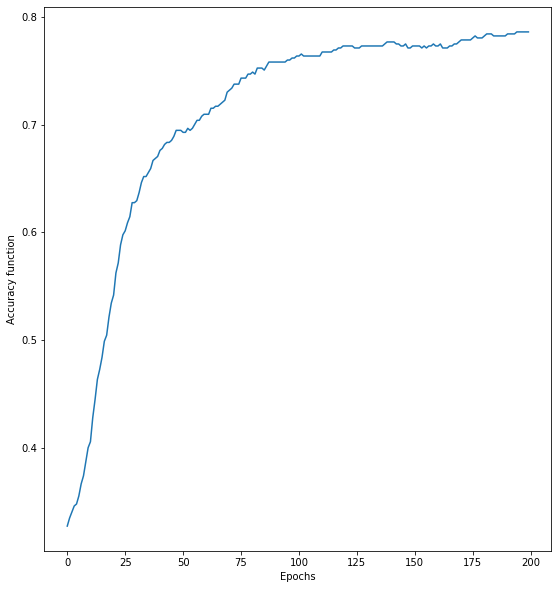

In [10]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [11]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")


8/8 [==============================] - 0s 5ms/step


In [12]:
Y_pred

array([[0.33058134],
       [0.17896536],
       [0.097727  ],
       [0.17592955],
       [0.62445366],
       [0.675579  ],
       [0.04227776],
       [0.39177844],
       [0.62925667],
       [0.6759359 ],
       [0.21204112],
       [0.8723722 ],
       [0.48541594],
       [0.33366632],
       [0.06712553],
       [0.29835743],
       [0.14097385],
       [0.09519446],
       [0.34829175],
       [0.6020282 ],
       [0.3455712 ],
       [0.13707986],
       [0.4782513 ],
       [0.10004719],
       [0.5136683 ],
       [0.808858  ],
       [0.08503573],
       [0.08125907],
       [0.3688336 ],
       [0.18967938],
       [0.77504647],
       [0.70482653],
       [0.6989768 ],
       [0.35159364],
       [0.606572  ],
       [0.5499367 ],
       [0.83588743],
       [0.3649413 ],
       [0.5260492 ],
       [0.27952242],
       [0.06501996],
       [0.49512568],
       [0.66098565],
       [0.2013591 ],
       [0.0786912 ],
       [0.5804916 ],
       [0.6844305 ],
       [0.190

In [13]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [14]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 4ms/step - loss: 0.5567 - accuracy: 0.7229
[0.5567423701286316, 0.7229437232017517]


In [15]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))


accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 5ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.784 	 0.734 	 0.601
  Test 	 0.723 	 0.611 	 0.550


In [16]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [17]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [18]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
#creamos la variable target a dummies
dummy_y = np_utils.to_categorical(Y).astype(int)

In [24]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [25]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [27]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200


/Users/emmet/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 344ms/step - loss: 2.8466 - accuracy: 0.3500 - val_loss: 1.8672 - val_accuracy: 0.3667
Epoch 2/200
2/2 [==============================] - 0s 68ms/step - loss: 1.8395 - accuracy: 0.3250 - val_loss: 1.2801 - val_accuracy: 0.3000
Epoch 3/200
2/2 [==============================] - 0s 273ms/step - loss: 1.1225 - accuracy: 0.4000 - val_loss: 0.8198 - val_accuracy: 0.7000
Epoch 4/200
2/2 [==============================] - 0s 58ms/step - loss: 0.8523 - accuracy: 0.6583 - val_loss: 0.8115 - val_accuracy: 0.7000
Epoch 5/200
2/2 [==============================] - 0s 127ms/step - loss: 0.8477 - accuracy: 0.6583 - val_loss: 0.7998 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 64ms/step - loss: 0.8436 - accuracy: 0.6583 - val_loss: 0.7464 - val_accuracy: 0.7000
Epoch 7/200
2/2 [==============================] - 0s 65ms/step - loss: 0.7777 - accuracy: 0.6583 - val_loss: 0.6724 - val_accuracy: 0.7000
Epoch 8/200
2/2 [============

2/2 [==============================] - 0s 76ms/step - loss: 0.3046 - accuracy: 0.8667 - val_loss: 0.1414 - val_accuracy: 0.9667
Epoch 118/200
2/2 [==============================] - 0s 52ms/step - loss: 0.1683 - accuracy: 0.9500 - val_loss: 0.1432 - val_accuracy: 0.9667
Epoch 119/200
2/2 [==============================] - 0s 51ms/step - loss: 0.1463 - accuracy: 0.9667 - val_loss: 0.1963 - val_accuracy: 0.9333
Epoch 120/200
2/2 [==============================] - 0s 57ms/step - loss: 0.1956 - accuracy: 0.9500 - val_loss: 0.2130 - val_accuracy: 0.8333
Epoch 121/200
2/2 [==============================] - 0s 52ms/step - loss: 0.2133 - accuracy: 0.9250 - val_loss: 0.1352 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 0s 43ms/step - loss: 0.1479 - accuracy: 0.9667 - val_loss: 0.1792 - val_accuracy: 0.9333
Epoch 123/200
2/2 [==============================] - 0s 63ms/step - loss: 0.1872 - accuracy: 0.9417 - val_loss: 0.1753 - val_accuracy: 0.9667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 57ms/step - loss: 0.1197 - accuracy: 0.9750 - val_loss: 0.1188 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 54ms/step - loss: 0.1277 - accuracy: 0.9750 - val_loss: 0.1212 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - 0s 51ms/step - loss: 0.1257 - accuracy: 0.9750 - val_loss: 0.1137 - val_accuracy: 1.0000
Epoch 178/200
2/2 [==============================] - 0s 71ms/step - loss: 0.1191 - accuracy: 0.9750 - val_loss: 0.1174 - val_accuracy: 0.9667
Epoch 179/200
2/2 [==============================] - 0s 65ms/step - loss: 0.1244 - accuracy: 0.9667 - val_loss: 0.1104 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 80ms/step - loss: 0.1178 - accuracy: 0.9750 - val_loss: 0.1087 - val_accuracy: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 51ms/step - loss: 0.1194 - accuracy: 0.9750 - val_loss: 0.1160 - val_accuracy: 0.9667
Epoch 

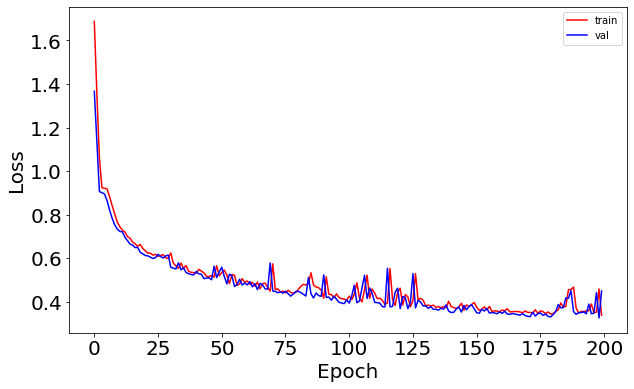

In [28]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [29]:
#Predecir con el modelo
#Y_pred = model.predict_classes(X)
#Y_prob = model.predict_proba(X)


Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 46ms/step


In [30]:
Y_pred

array([[2.6166239e-08, 5.2955329e-01, 4.7044677e-01],
       [9.6118188e-01, 3.8785383e-02, 3.2718035e-05],
       [4.2100810e-26, 2.3948392e-05, 9.9997604e-01],
       [8.4939238e-09, 4.4682568e-01, 5.5317438e-01],
       [1.7323599e-08, 4.9894208e-01, 5.0105780e-01],
       [9.6118188e-01, 3.8785383e-02, 3.2718035e-05],
       [6.2173372e-04, 9.6739352e-01, 3.1984810e-02],
       [1.1562788e-14, 2.0975146e-02, 9.7902483e-01],
       [9.5454880e-11, 1.8693337e-01, 8.1306660e-01],
       [4.4166318e-05, 9.2454606e-01, 7.5409681e-02],
       [2.4853999e-13, 4.5402180e-02, 9.5459789e-01],
       [9.6118188e-01, 3.8785383e-02, 3.2718035e-05],
       [9.6118188e-01, 3.8785383e-02, 3.2718035e-05],
       [9.6118188e-01, 3.8785383e-02, 3.2718035e-05],
       [9.6118188e-01, 3.8785383e-02, 3.2718035e-05],
       [1.5653264e-08, 4.9145114e-01, 5.0854886e-01],
       [7.1101667e-20, 9.6522702e-04, 9.9903476e-01],
       [1.5592272e-05, 8.9616674e-01, 1.0381766e-01],
       [1.2470186e-08, 4.747

In [31]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int32)

In [32]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [33]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [34]:
#Más métricas corregido
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')

Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 59ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.925 	 0.939 	 0.925
  Test 	 0.833 	 0.885 	 0.833


In [35]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000


/Users/emmet/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
